In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

#target_path = "/Users/martin/Repositories/VarClump-docs/paper/"
target_path = '/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/VarClump/'

### Loading the residual stats

In [2]:
elm_list = pickle.load( open('../../results/exp01_m2_orion.pkl', 'rb') )
r_stats_orion = [elm.residual_stats for elm in elm_list]

elm_list = pickle.load( open('../../results/exp01_m2_ngc3265.pkl', 'rb') )
r_stats_ngc3265 = [elm.residual_stats for elm in elm_list]

elm_list = pickle.load( open('../../results/exp01_m2_antennae.pkl', 'rb') )
r_stats_antennae = [elm.residual_stats for elm in elm_list]

## RMS

In [3]:
n_center = np.arange(50, 501, 25)
rms_orion = stat_extractor(r_stats_orion, 'rms')
rms_ngc3265 = stat_extractor(r_stats_ngc3265, 'rms')
rms_antennae = stat_extractor(r_stats_antennae, 'rms')

y_vars = [rms_orion, rms_ngc3265, rms_antennae]
labels = ['Orion', 'NGC3265','Antennae' ]

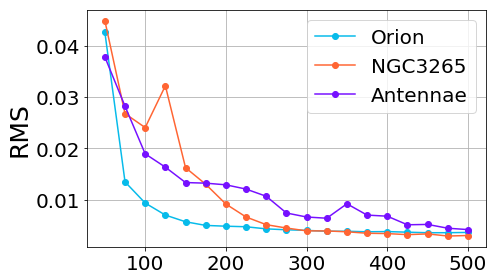

In [4]:
stat_plots(n_center, y_vars, labels=labels, ylabel='RMS', 
           save_name=target_path+"exp01_rms.eps",legend=True)

## Flux addition

In [5]:
fadd_orion = stat_extractor(r_stats_orion, 'flux_addition')
fadd_ngc3265 = stat_extractor(r_stats_ngc3265, 'flux_addition')
fadd_antennae = stat_extractor(r_stats_antennae, 'flux_addition')

y_vars = [fadd_orion, fadd_ngc3265, fadd_antennae]

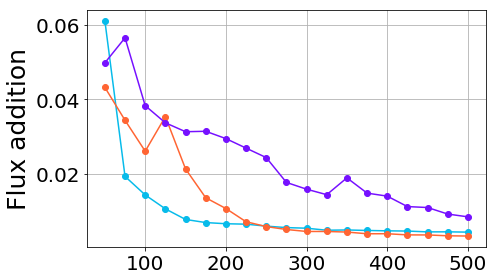

In [6]:
stat_plots(n_center, y_vars, labels=labels, ylabel='Flux addition', legend=False,
          save_name=target_path+"exp01_fadd.eps")

## Flux lost

In [7]:
flost_orion = stat_extractor(r_stats_orion, 'flux_lost')
flost_ngc3265 = stat_extractor(r_stats_ngc3265, 'flux_lost')
flost_antennae = stat_extractor(r_stats_antennae, 'flux_lost')

y_vars = [flost_orion, flost_ngc3265, flost_antennae]

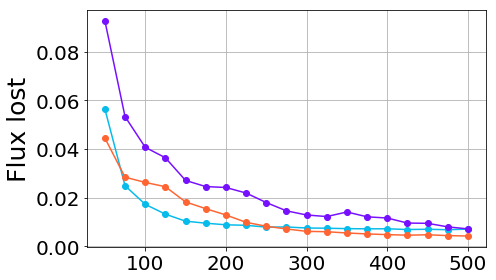

In [8]:
stat_plots(n_center, y_vars, labels=labels, ylabel='Flux lost', legend=False,
          save_name=target_path+"exp01_flost.eps")

## Sharpness

In [9]:
sharp_orion = stat_extractor(r_stats_orion, 'sharpness')
sharp_ngc3265 = stat_extractor(r_stats_ngc3265, 'sharpness')
sharp_antennae = stat_extractor(r_stats_antennae, 'sharpness')

y_vars = [sharp_orion, sharp_ngc3265, sharp_antennae]

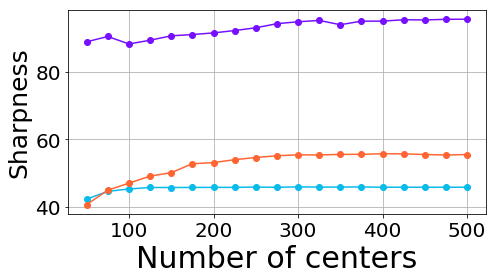

In [10]:
stat_plots(n_center, y_vars, labels=labels, xlabel='Number of centers', ylabel='Sharpness', legend=False,
          save_name=target_path+"exp01_sharp.eps")